**APLICACIÓN DE UN MODELO DE REGRESIÓN LINEAL MÚLTIPLE (MRLM)**

>Por: Heber Hernández Guerra: heber@nubeminera.cl 
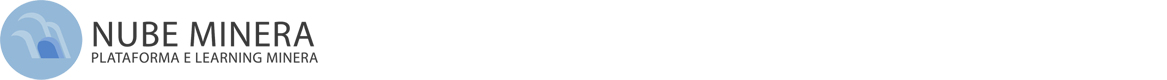


- **Caso de estudio: Contaminantes del aire medidos en la comunidad autonoma Vasca - España**

En el presente notebook se presenta un caso en el cual se debió ajustar un MRLM para con el regresando NO$_x$, correspondiente a un grupo de gases de óxido de nitrógeno, especificamente de los regresores NO y NO$_2$. Los datos fueron extraidos desde 43 estaciones de monitoreo dispuestas en las tres provincias del País Vasco durante el año 2019.

- **Contaminantes**:

    1. PM$_1$$_0$:Material particulado igual o menor a 10 micras.
    2. NO: Monóxido de nitrógeno.
    3. NO$_2$:Dioxido de nitrógeno.
    4. NO$_x$: Grupo combinado de NO y NO$_2$ (*se busca la ecuación que explique la variable*).


- **Referencia biblioteca contenendora del algoritmo MRLM:** http://www.statsmodels.org/stable/api.html

**1. Bibliotecas utilizadas:**

In [22]:
import statsmodels.formula.api as sfm #Biblioteca para estimar modelos estadísticos y realizar pruebas estadísticas.
import pandas as pd #Biblioteca para manipulación de marcos de datos
from pandas.plotting import scatter_matrix #Herramienta de Pandas para diagramas de dispersión en matriz.
import matplotlib.pyplot as plt #Biblioteca para la salida gráfica.
import numpy as np # Biblioteca de funciones matemáticas.

In [23]:
df = pd.read_excel("C:/Users/heber/Desktop/CURSO_GRAFICOS_EN_PYTHON/Regresión Lineal Multiple/" + "datos.xlsx", sep=",") #Ruta del archivo datos.xlsx
df.head() #Despliegue de las 5 primeras filas del DataFrame

,id,Coordenates X (ETRS89),Coordenates Y (ETRS89),NO (µg/m3),NO2 (µg/m3),NOX (µg/m3),PM10 (µg/m3)
0,1,527141.4365,4.744883e+06,8.782967,21.189560,34.472527,13.518414
1,2,493987.1750,4.796407e+06,5.199446,16.462604,24.204420,12.486567
2,3,549539.1393,4.744226e+06,4.480556,10.763889,17.708333,13.538674
3,4,498154.0000,4.801022e+06,6.953297,13.560440,24.123626,20.903846
4,5,500972.2158,4.788307e+06,2.454545,11.559659,15.312500,12.463687


In [24]:
df_2 = df.iloc[:,[3,4,5,6]] # Dataframe solo con los 4 contaminantes, excluyendo coordenadas. 
df_2.rename(columns={'PM10 (µg/m3)': "PM$_1$$_0$ (µg/m$^3$)", "NO2 (µg/m3)": "NO$_2$ (µg/m$^3$)", "NOX (µg/m3)":"NO$_x$ (µg/m$^3$)" }, inplace=True) #Edición de los titulos de columnas.        
df_2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NO (µg/m3),43.0,6.816391,4.363830,0.754930,3.340677,7.346041,8.745879,20.246835
NO$_2$ (µg/m$^3$),43.0,16.902090,7.370552,2.355556,11.161774,17.403846,21.692062,35.585443
NO$_x$ (µg/m$^3$),43.0,27.255321,13.636090,4.025000,16.247410,29.102639,34.482143,66.401899
PM$_1$$_0$ (µg/m$^3$),43.0,15.311702,3.559351,8.801170,12.630450,14.580175,16.789548,23.050000


**2. Ploteo Diagrama de dispersión en forma de matriz:** 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


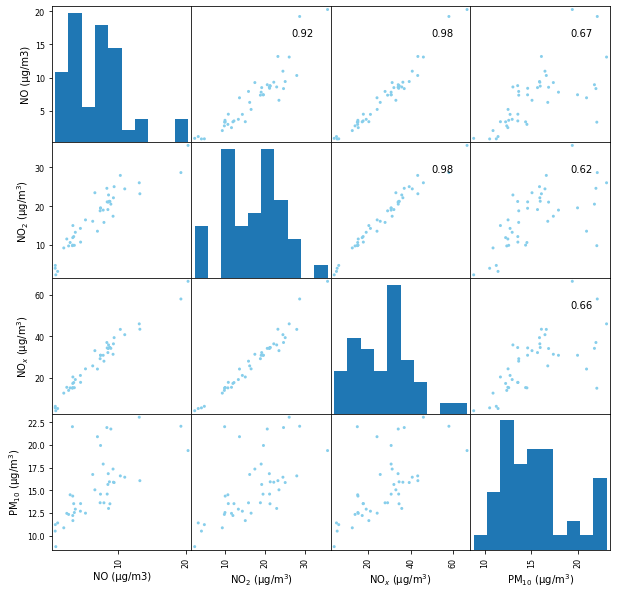

In [25]:
axes = scatter_matrix(df_2, alpha=1, figsize=(10,10), color="skyblue")
corr = df_2.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.2f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.savefig("C:/Users/heber/Desktop/CURSO_GRAFICOS_EN_PYTHON/Regresión Lineal Multiple/matrix_scatter.png", dpi=300) #ruta imagen guardada
plt.show()

**3. Variables de interés para el MLRM:**

In [26]:
variables = ["NO (µg/m3)", "NO2 (µg/m3)", "NOX (µg/m3)"] #Variables con mayor correlación, se descarta el PM10.
data = df[variables]
data.rename(columns={'NO (µg/m3)':'NO',
                          'NO2 (µg/m3)':'NO2',
                          'NOX (µg/m3)':'NOX'}, 
                 inplace=True)
data.head()

,NO,NO2,NOX
0,8.782967,21.189560,34.472527
1,5.199446,16.462604,24.204420
2,4.480556,10.763889,17.708333
3,6.953297,13.560440,24.123626
4,2.454545,11.559659,15.312500


In [27]:
lm = sfm.ols(formula="NOX~NO+NO2", data=data).fit() #NOX = regresando, NO+NO2 = regresores
#ols = Ordinary Least Squares o "mínimos cuadrados ordinarios"
lm.params #parametros de la ecuación

**Modelo regresión multiple: NO$_x$** = 0.290262 +  1.559730**NO** +  0.966350**NO$_2$**

**4. Evaluación del MLRM:**

In [29]:
lm.pvalues #nivel de significancia, se entiende que bajo 0.05 el p-value, se aprueba la hipotesis

Intercept    2.456217e-03
NO           4.880887e-47
NO2          8.012475e-48
dtype: float64

In [30]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOX   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.282e+04
Date:                Sun, 09 Feb 2020   Prob (F-statistic):           4.63e-74
Time:                        01:27:52   Log-Likelihood:                 8.6680
No. Observations:                  43   AIC:                            -11.34
Df Residuals:                      40   BIC:                            -6.052
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2903      0.090      3.233      0.002       0.109       0.472
NO             1.5597      0.018     86.126      0.000       1.523       1.596
NO2            0.9663      0.011     90.126      0.000       0.945       0.988
==============================================================================
Omnibus:                       22.654   Durbin-Watson:                   2.280
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.821
Skew:                          -1.185   Prob(JB):                     3.77e-14
Kurtosis:                       8.375   Cond. No.                         58.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**5. Ploteo del regresando versus NO$_x$ real:**

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


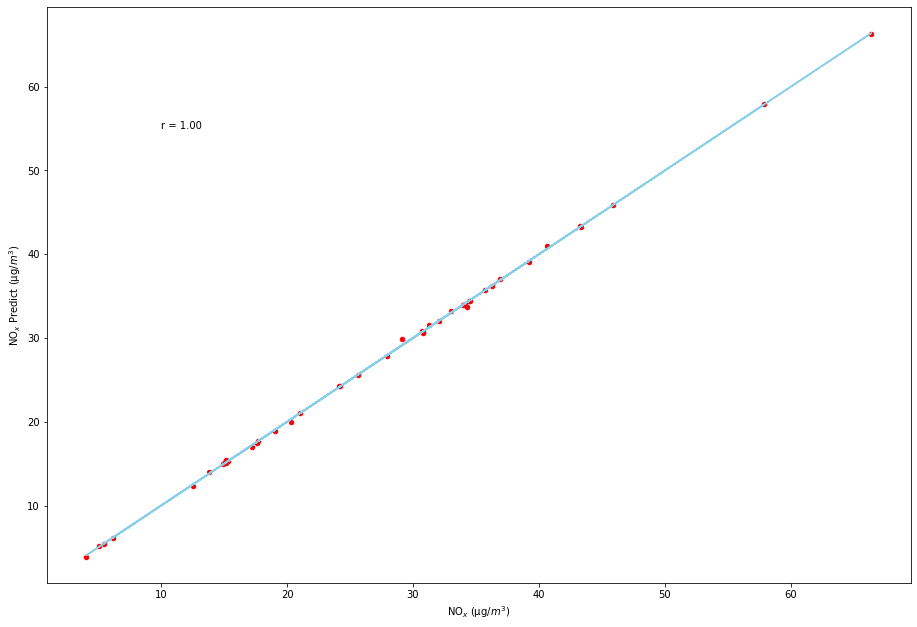

In [33]:
NOX_predict = lm.predict(data[["NO", "NO2"]])
data["NOX_predict"] = NOX_predict

x = data["NOX"] #todos los valores de la variable NOx
y = data["NOX_predict"] #todos los valores de la variable Nox estimada con MLRM

#Calculando los coeficientes del ajuste de regresión:
a, b = np.polyfit(x, y, 1) # 1 es el grado del polinomio
r = np.corrcoef(x, y) # r = coeficiente de correlación

plt.subplot(111)
plt.scatter(x,y, color="r", s=20)
plt.xlabel("NO$_x$ (µg/$m^3$)")
plt.ylabel("NO$_x$ Predict (µg/$m^3$)")
plt.plot(x, a * x + b, color="skyblue")
plt.text(10,55, 'r = {0:2.2f}'.format(r[0,1]))
#plt.text(10,55, 'NO$_x$ = {0:2.2f} NO$_x$ Predict + {1:2.3f}'.format(a,b))
plt.savefig("C:/Users/heber/Desktop/CURSO_GRAFICOS_EN_PYTHON/Regresión Lineal Multiple/nox_predict.png", dpi=300) #ruta imagen guardada
plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=2, wspace=0.2, hspace=0.2)
plt.show()